# Digitalization trends in global production networks: A data mining-based literature review 

This notebook is published together with a paper in the Production Engineering journal. A data mining and bibliometric approach is used to identify trending topics and their respective connection to other subject areas in the literature on global production networks (GPNs) and digitalization. Data mining is first used to identify relevant publications on GPN digitalization and their respective topics. The following figure shows the systematic search process for the identification of the documents in Scopus. 

In the source code, this search process is divided into the initial search, followed by the extended search for all further iterations.


<div>
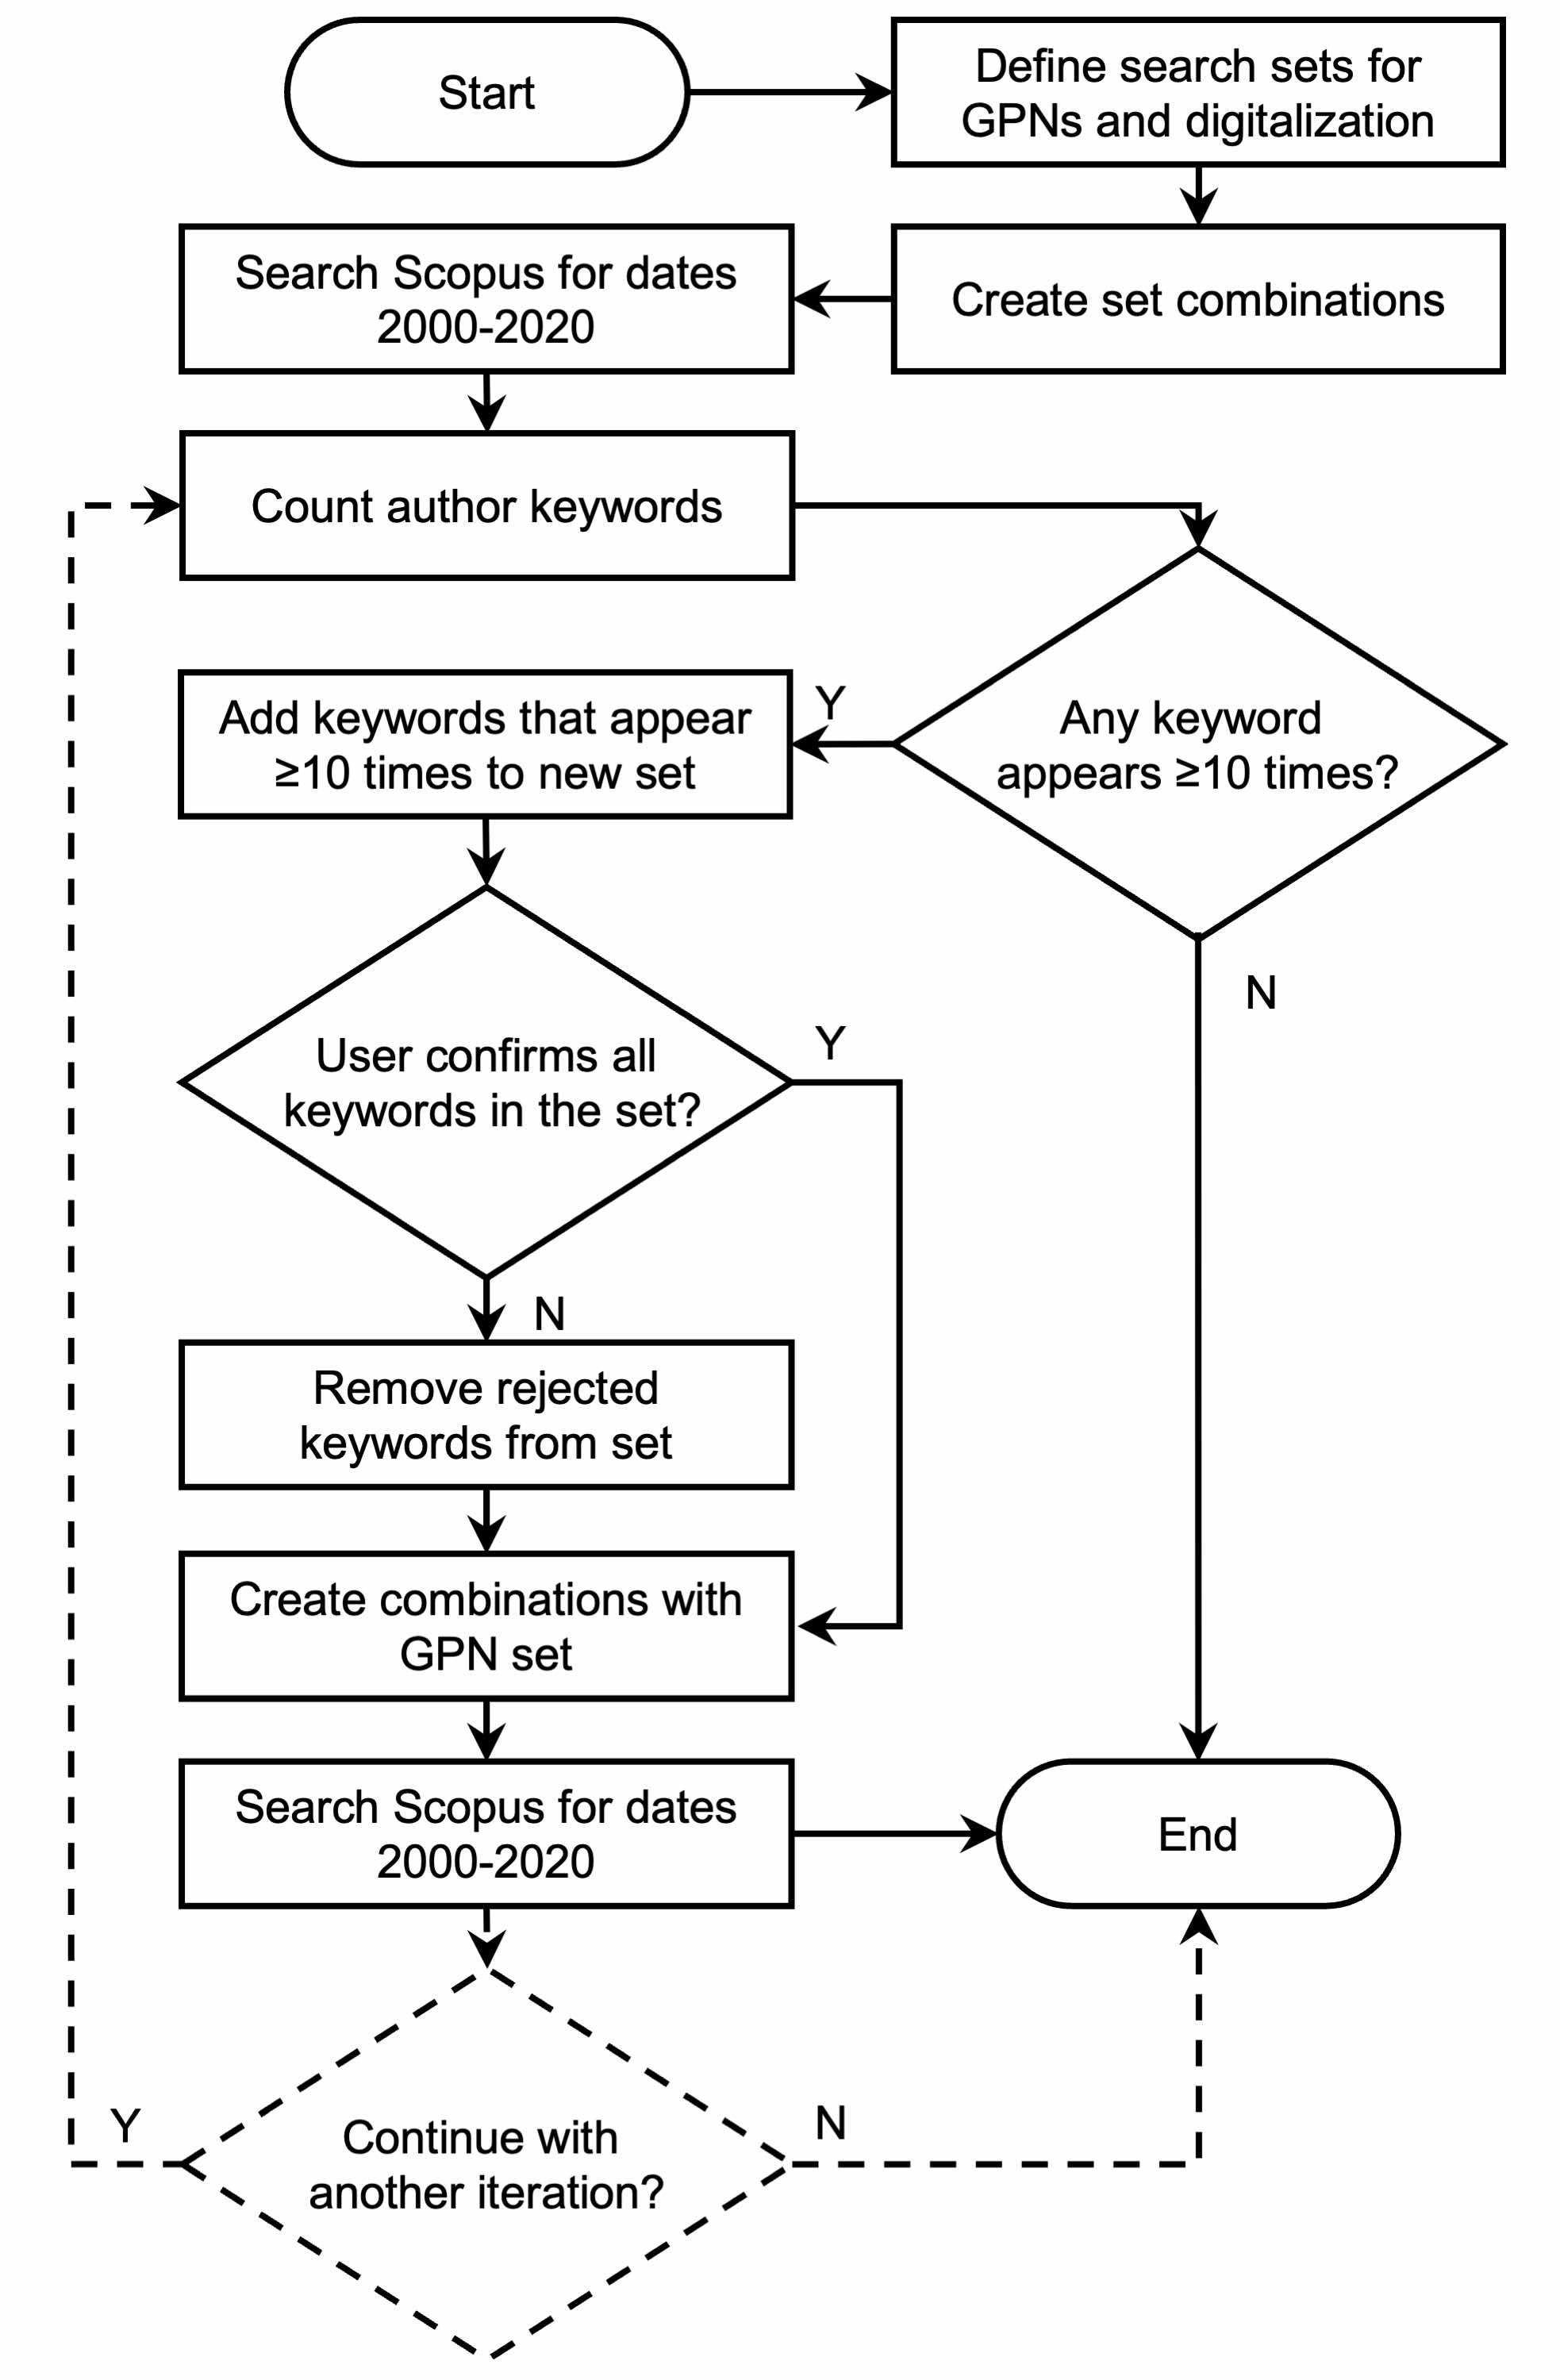
</div>

## Setup

In [ ]:
# Run the setup and load in data from other notebooks.
%run trendanalysis.ipynb

## Initial Search
Using the search terms below to get an initial list of keywords and topics that appear most commonly in the context of production networks and digitalisation.

In [ ]:
gpn_set = ['production network', 'value network', 'manufacturing network', 'value chain', 'supply chain']
digitalization_set = ['digitalization', 'digitization', 'digital transformation']

Create an instance of TrendAnalysis and run the initial search. The parameter "refresh" controls, whether the results all requests shall be resend to Scopus or loaded from cash. "to_file" specifies, whether a local copy of the results shall be created in the project folder.

In the initial search, a search in Scopus is conducted for every combination of search words from the two previously speficied lists. Each search is conducted between for documents of all types published between 2000 and 2020 in titles, abstracts and keywords (e.g. 'TITLE-ABS-KEY("production network" AND "digitalization") AND PUBYEAR > 1999 AND PUBYEAR < 2021').

In [ ]:
# Uncomment the line below to gain an insight into what parameters can be used to configure the TrendAnalysis object upon initialization
# help(TrendAnalysis.__init__)

In [ ]:
res = TrendAnalysis(gpn_set, digitalization_set, refresh=False, to_file=False)
res.run_initial_search()

### Review the results of the initial search

After the initial search, a dictionary is created for every search term that was used, which contains all identified documents for each search term.

In [ ]:
print(f"{len(res.initial_results)} documents were identified in the initial search.")
for search_term in res.initial_dict:
    print(f"{len(res.initial_dict[search_term])} results were identified for '{search_term}'.")

Inspect the most frequent author keywords of the documents of the initial search.

In [ ]:
count_entries(res.initial_results.authkeywords).most_common()[:35]

## Extended search

An subsequent search is then conducted for a selection of the most frequently occurring author keywords of the initial search. For this purpose, each new term is combined with those of the GPN set, to identify documents for specific aspects on the digitalization in GPNs. 

The results of this extended search are then combined with the results of the initial search to create the corpus of all relevant documents on GPN digitalization.

"Production" and "Manufacturing" are already filtered from the proposed search terms. This is because they are already thematically covered in the GPN set. Within the scope of the paper, "innovation" and "technology" were manually excluded.

Disclaimer: The broader the search terms, the longer the search will take. This limitation is due to limitations by the Scopus-API. Take this into account when selecting potential search parameters.

In [ ]:
# Uncomment the line below to get help on the search parameters
# help(res.run_extended_search)

In [ ]:
res.run_extended_search()

### Summary statistics
Inspect the results after the extended search.

In [ ]:
print(f"{len(res.ext_results)} documents were identified in the extended search.")
for search_term in res.ext_dict:
    print(f"{len(res.ext_dict[search_term])} results were identified for '{search_term}'.")

Most frequently occurring keywords in all documents.

In [ ]:
count_entries(res.ext_results.authkeywords).most_common()[:30]

Most common publication type

In [ ]:
Counter(res.ext_results.subtypeDescription).most_common()

Number of documents without keywords.

In [ ]:
print(f"{len(res.ext_results.loc[res.ext_results.authkeywords.isnull()])} documents did not have and keywords.")
for doc_type in Counter(res.ext_results.subtypeDescription).most_common():
    no_keywords = len(res.ext_results.loc[res.ext_results.subtypeDescription==doc_type[0]])
    if no_keywords != 0:
        percentage = len(res.ext_results.loc[(res.ext_results.subtypeDescription==doc_type[0]) & (res.ext_results.authkeywords.isnull())])/ no_keywords
        print(f"{round(percentage*100,1)}% of {doc_type[0]}s do not have any author keywords.")

Compare the top keywords for the different terms in the production search term set.

In [ ]:
for production_term in gpn_set:
    print(f"The top 5 author keywords for {production_term} are:")
    top5 = count_entries(res.ext_results.loc[res.ext_dict[production_term]].authkeywords).most_common()[:5]
    for keyword in top5:
        print(f"\t{keyword[0]} ({keyword[1]})")

Number of publications by country

In [ ]:
Counter(res.ext_results.affiliation_country).most_common()[:10]

The most-cited documents.

In [ ]:
i = 1
for document in res.ext_results.citedby_count.sort_values(ascending=False).index[:5]:
    authors = res.ext_results.loc[document].author_names
    subtype = res.ext_results.loc[document].subtypeDescription
    title = res.ext_results.loc[document].title
    citations = res.ext_results.loc[document].citedby_count
    print(f"{i}. {citations} citations: {subtype} by {authors}: \n'{title}'\n")
    i += 1

## Trend analyis
In the following, we look at which topics represent the fastest growing trends in the literature on GPN digitalization. For that purpose, we rank the different topics (search terms from the extended search) by looking at the difference between the percentages of search results for the specific term between 2020 and 2015. This difference in percentages is referred to as growth factor (GF).

Example for blockchain:
$$
GF_{2015-2020}(Blockchain) = \frac{\# blockchain \: publications_{2020}}{\# total \: publications_{2020}} - \frac{\# blockchain \: publications_{2015}}{\# total \: publications_{2015}}
$$

plot_analysis provides information on the trends in descending order according to the GF. The information contains number of documents per year per trend, the most cited documents per trend and a bubble chart for the most frequently occorring keywords in the documents on the specific trend.

In [ ]:
res.plot_analysis()

Summary KPIs for different topics

In [ ]:
res.rankings.sort_values(by=['Growth'], ascending=False)

Uncomment the following lines to export the rankings and time series to csv files.

In [ ]:
# res.rankings.to_csv('Rankings.csv')
# res.sw_ts_a.to_csv('Search word TS.csv')
# res.sw_ts_share_a.to_csv('Search word TS share.csv')
# res.total_pub.to_csv('Total pub TS.csv')

Plot for total number of publications and publications without keywords.

In [ ]:
res.total_pub.plot()

# Detailed trend analysis

In the following some of the largest and fastest growing trends are evaluated

## Blockchain

Search results for "blockchain" and "blockchain technology"

In [ ]:
len(res.ext_dict['blockchain'])

In [ ]:
len(res.ext_dict['blockchain technology'])

In [ ]:
# All results for "blockchain technology" are already identified for "blockchain"
len(set(res.ext_dict['blockchain']+res.ext_dict['blockchain technology']))

## Industry 4.0

Combined publications for "industry 4.0" and "industrie 4.0"

In [ ]:
len(set(res.ext_dict['industry 4.0']+res.ext_dict['industrie 4.0']))

Combined citations for "industry 4.0" and "industrie 4.0"

In [ ]:
res.ext_results.loc[res.ext_dict['industry 4.0']+res.ext_dict['industrie 4.0']].citedby_count.sum()

GF when combining "Industry 4.0" and "Industrie 4.0"

In [ ]:
res.calc_combined_gf(['industry 4.0', 'industrie 4.0'])

Top citations for the combined terms

In [ ]:
docs = res.ext_results.loc[set(res.ext_dict['industry 4.0']+res.ext_dict["industrie 4.0"])].citedby_count.sort_values(ascending=False)[:10]
for doc in docs.index:
    print(res.ext_results.loc[doc].title,  "\n",res.ext_results.loc[doc].author_names, "\n", docs[doc], "\n")

## IOT


Combined publications for "internet of things" and "iot"

In [ ]:
print(f"{len(res.ext_dict['internet of things'])} documents have been identified for 'internet of things'.")

In [ ]:
print(f"{len(res.ext_dict['iot'])} documents have been identified for 'iot'.") 

In [ ]:
# Combined number of results
len(set(res.ext_dict['internet of things']+res.ext_dict['iot']))

Combined number of citations

In [ ]:
res.ext_results.loc[set(res.ext_dict['internet of things']+res.ext_dict['iot'])].citedby_count.sum()

GF when combining "IOT" and "internet of things"

In [ ]:
res.calc_combined_gf(['internet of things', 'iot'])

Top citations on IOT/Internet of Things

In [ ]:
docs = res.ext_results.loc[set(res.ext_dict['internet of things']+res.ext_dict['iot'])].citedby_count.sort_values(ascending=False)[:5]
for doc in docs.index:
    print(res.ext_results.loc[doc].title,  "\n",res.ext_results.loc[doc].author_names, "\n", docs[doc], "\n")

## VOSviewer export
We offer the opportunity to export the data sets so that they can be used with VOSviewer to create a thematic map of different topics. Exports will be saved in the project folder.

In [ ]:
res.export_for_vos("blockchain")
res.export_for_vos(["industry 4.0", "industrie 4.0"])
res.export_for_vos(["internet of things", "iot"])
res.export_for_vos("circular economy")
# Export keyword data from all documents in the extended search
res.export_for_vos()

## Export table of top publications
The following cells contains calls to export the top documents by citations for specific topics or in the whole data set.

In [ ]:
res.export_top_pub_table("blockchain")
res.export_top_pub_table(["industry 4.0", "industrie 4.0"])
res.export_top_pub_table(["internet of things", "iot"])
res.export_top_pub_table("circular economy")
# Export data on the most frequently cited documents in the whole data set.
res.export_top_pub_table()